Image inpainting using an algorithm based on ‘biharmonic equation’-assumption, as implemented in scikit-image.

# About

The inpainting part of the code below is a modified version of [this code](https://scikit-image.org/docs/dev/auto_examples/filters/plot_inpaint.html). The origial code was created by van der Walt and coathors, and released under a permissive [license](https://github.com/scikit-image/scikit-image/blob/master/LICENSE.txt). The copy of the license is attached to the end of this file. Please cite their paper to support them:

```
Stéfan van der Walt, Johannes L. Schönberger, Juan Nunez-Iglesias, François Boulogne, Joshua D. Warner, Neil Yager, Emmanuelle Gouillart, Tony Yu, and the scikit-image contributors. 
scikit-image: Image processing in Python. PeerJ 2:e453 (2014) https://doi.org/10.7717/peerj.453
```

The preprocessing part is a based on [this code](https://github.com/DmitryUlyanov/deep-image-prior). The original code was created by Dmitry Ulyanov and coauthors, and released under Apache License 2.0. The copy of the license is attached to the end of this file. Please cite their paper to support them:

```
@article{UlyanovVL17,
    author    = {Ulyanov, Dmitry and Vedaldi, Andrea and Lempitsky, Victor},
    title     = {Deep Image Prior},
    journal   = {arXiv:1711.10925},
    year      = {2017}
}
```

# Import depedencies




In [16]:
%matplotlib inline

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.restoration import inpaint

from PIL import Image
import PIL

import requests
from io import BytesIO

# Define the damaged image and the mask

**damaged_path** is the url of the damaged image.
**mask_path** is the url of the mask (it outlines the damage).

If you want to replace the images with your own, ensure that:
*   both images have the same dimension
*   the mask image should be black stuff on a white background
*   the mask should correspond to the damage on the damaged image 

For a quick test, use images smaller than 1000 x 1000. Otherwise, the process will take a long time.

In [18]:
#damaged_path = 'https://i.imgur.com/OkD0ZzE.png'
#mask_path = 'https://i.imgur.com/a6p0SJ2.png'

#damaged_path = 'https://i.imgur.com/MADDaRQ.png'
#mask_path = 'https://i.imgur.com/CywO5K4.png'

#damaged_path = 'https://i.imgur.com/BB1Hz0c.png'
#mask_path = 'https://i.imgur.com/zAQQUML.png'

#damaged_path = 'https://i.imgur.com/e1fzWO9.png'
#mask_path = 'https://i.imgur.com/oGElfVu.png'

damaged_path = 'https://i.imgur.com/YaDp5gm.png'
mask_path = 'https://i.imgur.com/AfJEKcc.png'

# Define image pre-processing functions

In [19]:
def load_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    return img

In [20]:
def pil_to_np(img_PIL):
    '''Converts image in PIL format to np.array.
    
    From W x H x C [0...255] to C x W x H [0..1]
    '''
    ar = np.array(img_PIL)

    if len(ar.shape) == 3:
        ar = ar.transpose(2,0,1)
    else:
        ar = ar[None, ...]

    return ar.astype(np.float32) / 255.

In [21]:
def get_image(path, imsize=-1, locally7=True):
    """Load an image and resize to a cpecific size. 

    Args: 
        path: path to image
        imsize: tuple or scalar with dimensions; -1 for `no resize`
    """
    if locally7:
        img = load(path)
    else:
        img = load_from_url(path)
    

    if isinstance(imsize, int):
        imsize = (imsize, imsize)

    if imsize[0]!= -1 and img.size != imsize:
        if imsize[0] > img.size[0]:
            img = img.resize(imsize, Image.BICUBIC)
        else:
            img = img.resize(imsize, Image.ANTIALIAS)

    img_np = pil_to_np(img)

    #img_np = img_np[:,:,:3]

    return img, img_np

# Load the images and pre-process them

In [22]:
img_damaged_pil, img_damaged_np = get_image(damaged_path, -1, locally7=False)
img_mask_pil, img_mask_np = get_image(mask_path, -1, locally7=False)

In [23]:
img_damaged_np_transposed = np.transpose(img_damaged_np, (1,2,0))
img_mask_np_transposed = np.transpose(img_mask_np, (1,2,0))

In [24]:
image_defect = img_damaged_np_transposed
mask_full = img_mask_np_transposed

In [25]:
image_defect.shape, mask_full.shape

((738, 700, 3), (738, 700, 3))

In [26]:
mask_flat = mask_full[:, :, 0]
mask_flat.shape

(738, 700)

In [27]:
mask = np.where(mask_flat > 0.5, 0., 1.)

In [28]:
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# This is there the inpainting happens

In [29]:


image_result = inpaint.inpaint_biharmonic(image_defect, mask,
                                          multichannel=True)



# Plot the results

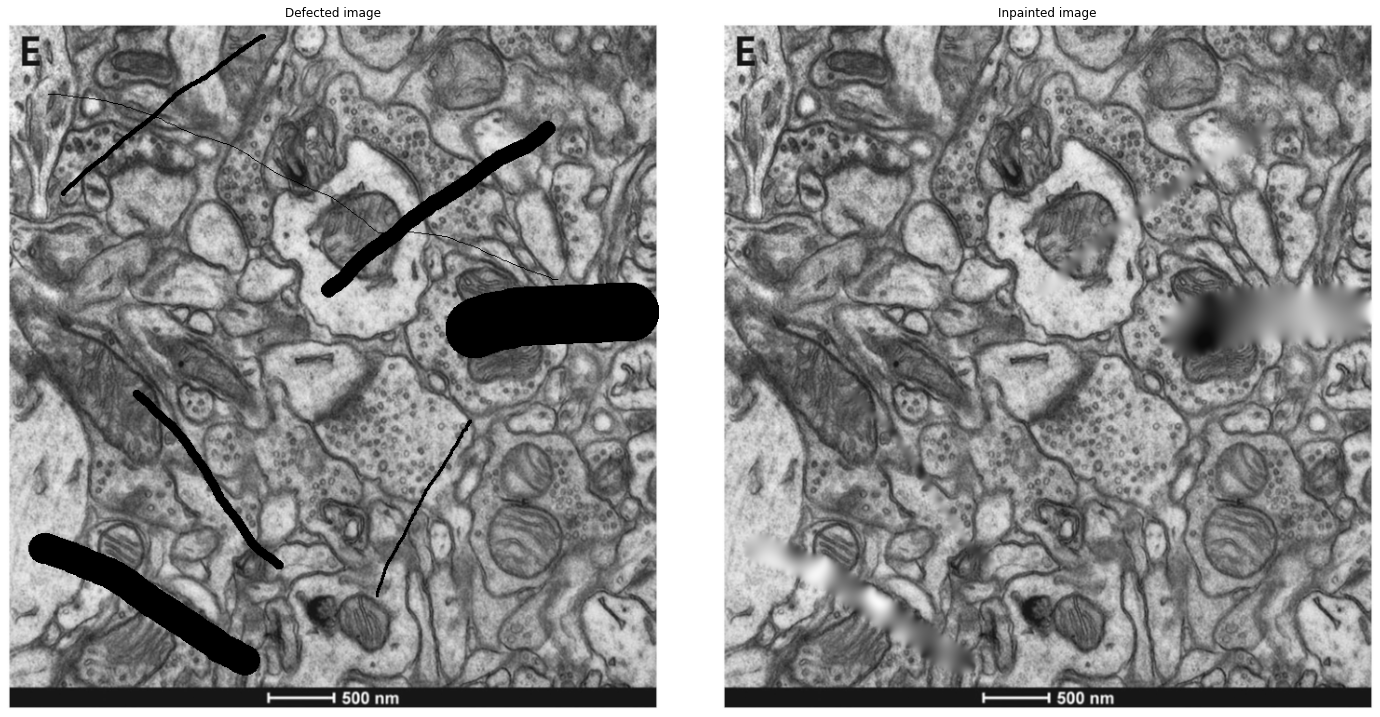

In [30]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
ax = axes.ravel()

ax[0].set_title('Defected image')
ax[0].imshow(image_defect)

ax[1].set_title('Inpainted image')
ax[1].imshow(image_result)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

# Third-party code copyright nocitices

## van der Walt et al, 2014:

Copyright (C) 2019, the scikit-image team
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

 1. Redistributions of source code must retain the above copyright
    notice, this list of conditions and the following disclaimer.
 2. Redistributions in binary form must reproduce the above copyright
    notice, this list of conditions and the following disclaimer in
    the documentation and/or other materials provided with the
    distribution.
 3. Neither the name of skimage nor the names of its contributors may be
    used to endorse or promote products derived from this software without
    specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE AUTHOR ``AS IS'' AND ANY EXPRESS OR
IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED
WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL THE AUTHOR BE LIABLE FOR ANY DIRECT,
INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES
(INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION)
HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT,
STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING
IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE
POSSIBILITY OF SUCH DAMAGE.

skimage/_shared/version_requirements.py:_check_version

    Copyright (c) 2013 The IPython Development Team
    All rights reserved.

    Redistribution and use in source and binary forms, with or without
    modification, are permitted provided that the following conditions are met:

    * Redistributions of source code must retain the above copyright notice, this
      list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above copyright notice,
      this list of conditions and the following disclaimer in the documentation
      and/or other materials provided with the distribution.

    * Neither the name of the copyright holder nor the names of its
      contributors may be used to endorse or promote products derived from
      this software without specific prior written permission.

    THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
    AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
    IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
    DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
    FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
    DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
    SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
    CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
    OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
    OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

skimage/_shared/version_requirements.py:is_installed:

    Original Copyright (C) 2009-2011 Pierre Raybaut

    Permission is hereby granted, free of charge, to any person obtaining
    a copy of this software and associated documentation files (the
    "Software"), to deal in the Software without restriction, including
    without limitation the rights to use, copy, modify, merge, publish,
    distribute, sublicense, and/or sell copies of the Software, and to
    permit persons to whom the Software is furnished to do so, subject to
    the following conditions:

    The above copyright notice and this permission notice shall be
    included in all copies or substantial portions of the Software.

    THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
    EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF
    MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
    NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE
    LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION
    OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION
    WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


## Ulyanov et al, 2017

Apache License 2.0

But please contact me if you want to use this software in a commercial application. 

Note that Apache License 2.0 asks to include a copyright notice if you use this software. 